# UMETNA INTELIGENCA IN STROJNO UČENJE
##   PROJEKTNA NALOGA - Bisera Angelovska 

### 1.  Uvod



##### 1.1 Opis problema
Kakovost vode je ključen dejavnik za zagotavljanje zdravja ljudi. V številnih okoljih obstaja potreba po zanesljivem ocenjevanju, ali je določena vzorčna voda primerna za pitje. Ta projekt se osredotoča na uporabo metod umetne inteligence za napovedovanje pitnosti vode (angl. potability), torej ali je voda varna za človeško porabo. Cilj je zgraditi modele strojnega učenja, ki lahko na podlagi različnih parametrov kakovosti vode ocenijo, ali je določena vzorčna voda pitna ali ne.

##### 1.2 Razdelitev atributov

Podatkovni niz vsebuje več atributov, ki opisujejo fizikalno-kemijske lastnosti vode. Te atribute lahko razdelimo v naslednje skupine:
- Kemijski parametri: pH (kislost ali bazičnost vode); sulfate (koncentracija sulfatov); trihalomethanes (koncentracija),
- Fizikalni parametri: hardness (trdota vode oziroma vsebnost mineralov); Solids: celotna količina raztopljenih snovi ;Conductivity (električna prevodnost vode) ; turbidity( motnost (jasnost) vode)
- Organski parametri: Organic_carbon (vsebnost organskega ogljika)

##### 1.3 Ciljna spremenljivka

Ciljna spremenljivka v podatkovnem nizu je "Potability", ki označuje, ali je voda in sicer:

- 0 pomeni, da voda ni pitna
    
- 1 pomeni, da je voda pitna
    

##### 1.4 Pomembnost zastavljenega problema

Dostop do varne in zdrave pitne vode je temeljna človekova pravica in eden ključnih dejavnikov za ohranjanje javnega zdravja. Kljub napredku na področju tehnologije in infrastrukture, številne regije po svetu še vedno trpijo zaradi pomanjkanja kakovostne vode ali nezadostnega nadzora nad njeno varnostjo. Onesnažena pitna voda je lahko vir različnih bolezni, okužbe prebavil in zastrupitve s kemikalijami, kar ima lahko resne posledice za zdravje ljudi, še posebej otrok in ranljivih skupin.

Tradicionalne metode analize kakovosti vode zahtevajo laboratorijsko opremo, strokovno znanje in časovno zahtevne postopke. Zato je pomembno razvijati sodobne, hitre in zanesljive pristope za ocenjevanje pitnosti vode. Uporaba metod umetne inteligence in strojnega učenja pri analizi podatkov o kakovosti vode omogoča avtomatizirano napovedovanje, ali je voda primerna za pitje. Takšne metode lahko pomembno prispevajo k bolj učinkovitemu spremljanju kakovosti vode, zgodnjemu odkrivanju potencialno nevarnih vzorcev in izboljšanju odziva ustreznih služb.

S projektom, v katerem bomo analizirali podatke o kakovosti vode in s pomočjo modelov strojnega učenja napovedovali pitnost, želimo prispevati k razvoju rešitev, ki omogočajo hitro, cenovno dostopno in podatkovno podprto ocenjevanje varnosti vodnih virov. Takšni pristopi so posebej uporabni za okolja, kjer laboratorijski viri niso dostopni ali so omejeni.

##### 1.5 Načrt postopka rešitve 
    

Reševanje problema napovedovanja pitnosti vode bo potekalo po naslednjih zaporednih fazah:

1. **Priprava okolja in podatkov**  
Najprej bomo uvozili vse potrebne knjižnice in naložili podatkovno množico. S tem bomo omogočili nadaljnjo analizo in obdelavo podatkov.

2. **Raziskovalna analiza podatkov (EDA)**  
V tej fazi bomo podatke statistično in vizualno analizirali. Preverili bomo osnovne značilnosti, kot so porazdelitev vrednosti, prisotnost ekstremov (outlierjev) in povezave med atributi.

3. **Obdelava manjkajočih vrednosti in predprocesiranje**  
Identificirali bomo stolpce z manjkajočimi vrednostmi in se odločili, kako jih nadomestiti ali odstraniti. Po potrebi bomo izvedli tudi dodatne korake, kot so normalizacija ali kodiranje.

4. **Razdelitev podatkovne množice**  
Podatke bomo razdelili na učno (train) in testno (test) množico. To nam bo omogočilo učenje modela na enem delu podatkov in neodvisno preverjanje uspešnosti na drugem.

5. **Izbor in učenje modelov strojnega učenja**  
Uporabili bomo različne algoritme za binarno klasifikacijo, kot so logistična regresija, naključni gozd (Random Forest), podprti vektorski stroj (SVM) ali XGBoost. Vsak model bomo naučili prepoznavati vzorce v podatkih.

6. **Evalvacija modelov**  
Uspešnost modelov bomo ovrednotili z uporabo ustreznih metrik, kot so natančnost (*accuracy*), občutljivost (*recall*), *F1-score* ter AUC (*area under the curve*). Uporabili bomo tudi matriko zmede (*confusion matrix*).

7. **Primerjava modelov in izbira najboljšega**  
Na podlagi evalvacijskih metrik bomo primerjali delovanje vseh modelov in izbrali tistega, ki daje najboljše rezultate pri napovedovanju pitnosti vode.

8. **Interpretacija rezultatov in optimizacija**  
Analizirali bomo, kateri atributi so najbolj vplivali na končno napoved modela in ocenili, ali so rezultati primerni za uporabo v praksi. Povezali bomo rezultate z realnim pomenom problema – zagotavljanje varne pitne vode.

Ta postopek omogoča strukturirano in učinkovito rešitev problema ter omogoča transparentno in ponovljivo analizo.



### 2. Opis podatkov



##### 2.1 Vir in uvoz podatkov

Podatkovna množica je bila pridobljena s platforme Kaggle, z naslovom *Water Quality – Potability*. Vsebuje meritve kakovosti vode in oceno, ali je voda primerna za pitje.
    
Cilj je napovedati, ali je voda pitna ali nepitna na podlagi fizikalno-kemijskih lastnosti, kot so pH, trdota, vsebnost raztopljenih snovi, kloramini ipd. Za začetek bomo uvozili ustrezne knjižnice, naložili podatke in preverili osnovno strukturo.

    


In [101]:
# Uvoz potrebnih knjižnic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Nalaganje podatkovne množice
data = pd.read_csv('water_potability.csv')


# Izpis prvih nekaj vrstic podatkov za pregled
print("Prvih vrstic podatkov:")
print(data.head())

# Prikaz imen vseh stolpcev v podatkovnem nizu
print("Imena stolpcev podatkov:")
print(data.columns)


# Izpis osnovnih informacij o datasetu
print("\nStruktura podatkov:")
print(data.info())


Prvih vrstic podatkov:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Imena stolpcev podatkov:
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalom

##### 2.2 Opis podatkov in število primerov in značilk

Podatkovna množica vključuje devet značilk, ki opisujejo fizikalno-kemijske lastnosti vode, ter eno ciljno spremenljivko Potability, ki določa, ali je voda primerna za pitje. Spodaj je naveden podroben opis vsake značilke.

- **pH** predstavlja merilo kislosti oziroma bazičnosti vode in se giblje v območju od 0 do 14. Vrednost 7 pomeni nevtralno vodo, nižje vrednosti označujejo kislo, višje pa bazično vodo. Pitna voda naj bi imela pH vrednost med 6.5 in 8.5. Vrednosti izven tega območja lahko povzročijo korozijo cevi ali negativno vplivajo na zdravje ljudi.

- **Hardness** se nanaša na trdoto vode, kar pomeni vsebnost mineralov, predvsem kalcija in magnezija. Trda voda ni nevarna za zdravje, vendar lahko povzroča nalaganje vodnega kamna in zmanjšuje učinkovitost mil. Premehka voda pa lahko povzroča korozijo cevi. Trdota se običajno meri kot ekvivalentna količina kalcijevega karbonata v vodi.

- **Solids** opisuje skupno količino raztopljenih snovi (Total Dissolved Solids – TDS) v vodi, kar vključuje mineralne soli, organske snovi, kovine in druge delce. Visoke vrednosti raztopljenih snovi lahko vplivajo na okus, barvo in varnost vode. Pitna voda naj bi imela vrednost TDS pod 1000 mg/L.

- **Chloramines** so kemijske spojine, ki nastanejo z mešanjem klora in amonijaka, pogosto pa se uporabljajo kot sredstvo za dezinfekcijo pitne vode. So učinkoviti pri ubijanju mikroorganizmov, vendar previsoke koncentracije lahko povzročijo neželene učinke, kot so draženje oči ali sprememba okusa vode.

- **Sulfate** označuje vsebnost sulfatov v vodi, ki se pojavljajo kot naravne sestavine zaradi raztapljanja mineralov. Visoke koncentracije lahko vplivajo na okus vode in povzročijo prebavne težave, še posebej pri občutljivih osebah. Sulfati so v vodi prisotni kot SO₄²⁻ ioni.

- **Conductivity** meri električno prevodnost vode, kar je neposredno povezano z vsebnostjo ionov oziroma raztopljenih soli. Višja prevodnost pomeni večjo količino mineralov v vodi. Ta lastnost je pomembna za ocenjevanje čistosti vode in odkrivanje morebitnih onesnaženj.

- **Organic_carbon** se nanaša na količino organskega ogljika, prisotnega v vodi. Lahko izvira iz naravnih virov, kot so razpadajoče rastline, ali iz človekovih dejavnosti. Visoka vsebnost organskega ogljika lahko negativno vpliva na učinkovitost dezinfekcije in vodi do nastanka škodljivih stranskih produktov.

- **Trihalomethanes** so stranski produkti, ki nastanejo med postopkom dezinfekcije z uporabo klora. Gre za hlapne organske spojine, med katerimi je najpogostejši kloroform. Ker so trihalometani potencialno rakotvorni, je njihova koncentracija v vodi strogo regulirana in jo je treba spremljati.

- **Turbidity** opisuje motnost vode, ki je posledica prisotnosti zelo drobnih delcev, kot so pesek, glina, bakterije ali organski materiali. Višja motnost lahko kaže na večje tveganje za prisotnost škodljivih mikroorganizmov in zmanjšuje učinkovitost dezinfekcije.

- **Potability** je ciljna spremenljivka, ki označuje, ali je določeni vzorec vode primeren za pitje. Vrednost 1 pomeni, da je voda pitna, medtem ko vrednost 0 pomeni, da ni primerna za človeško uživanje. Modeli strojnega učenja bodo uporabljeni za napovedovanje te značilke na podlagi ostalih parametrov.

In [25]:
# Izpis oblike podatkovne množice
print(f"Oblika podatkovne množice: {data.shape}")

# Posamezno:
print(f"Število primerov (vrstic): {data.shape[0]}")
print(f"Število stolpcev (značilnosti + ciljna): {data.shape[1]}")


Oblika podatkovne množice: (3276, 10)
Število primerov (vrstic): 3276
Število stolpcev (značilnosti + ciljna): 10


##### 2.3 Opis potrebnega predprocesiranja

Preden lahko podatke uporabimo za učenje modelov strojnega učenja, je nujno izvesti več korakov predprocesiranja. Ti koraki zagotavljajo, da so podatki čisti, dosledni in primerni za analizo ter napovedovanje.

V tem projektu bomo izvedli naslednje korake predprocesiranja:

- **Preverjanje manjkajočih vrednosti:**  
  Manjkajoče vrednosti lahko negativno vplivajo na zanesljivost modelov. V našem primeru bomo manjkajoče vrednosti nadomestili z ustreznimi statističnimi ocenami, kot je mediana. 

- **Preverjanje in obravnava ekstremnih vrednosti:**  
  Zaradi narave kemijskih meritev je pomembno preveriti obstoj ekstremnih ali nemogočih vrednosti. V tej fazi bomo preverili naslednje:
  - *Fizično nemogoče vrednosti*: ki kršijo naravne zakone ali tehnične omejitve meritev (npr. negativna pH vrednost).
  - Opomba: Zaradi omejenega strokovnega znanja s področja kemije bomo obravnavali samo očitno nemogoče vrednosti.

- **Standardizacija numeričnih vrednosti:**  
  Ker modeli, kot so logistična regresija, SVM in KNN, temeljijo na razdaljah ali linearnih povezavah, je pomembno, da so značilke v primerljivih razponih. Uporabili bomo standardizacijo (StandardScaler).

- **Razdelitev podatkov na učno in testno množico:**  
  Podatke bomo razdelili v razmerju 75 % za učenje in 25 % za testiranje, da omogočimo neodvisno oceno učinkovitosti modela.

- **Standardizacija numeričnih vrednosti:**  
  Ker modeli, kot so logistična regresija, SVM in KNN, temeljijo na razdaljah ali linearnih povezavah, je pomembno, da so značilke v primerljivih razponih. Uporabili bomo standardizacijo (StandardScaler). (Narejeno ravno pri uporaba metode za napovedovanje )
  
Ti koraki so ključni za zagotovitev kakovosti podatkov in uspešnosti nadaljnjega modeliranja.


##### 2.4 Čiščenje podatkov

In [39]:
# Preverjanje manjkajočih vrednosti
if data.isnull().sum().sum() == 0:
    print('V našem naboru podatkov ni manjkajočih vrednosti.')
else:
    print(f'V našem naboru podatkov je {data.isnull().sum().sum()} manjkajočih vrednosti.')

# Preverjanje manjkajočih podatkov po stolpcih in njihove unikatne lastnosti
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis=1, keys=['Manjkajoče Vrednosti', 'Število Unikatov', 'Tip Podatka'])
print(frame)



V našem naboru podatkov ni manjkajočih vrednosti.
                 Manjkajoče Vrednosti  Število Unikatov Tip Podatka
ph                                  0              2785     float64
Hardness                            0              3276     float64
Solids                              0              3276     float64
Chloramines                         0              3276     float64
Sulfate                             0              2495     float64
Conductivity                        0              3276     float64
Organic_carbon                      0              3276     float64
Trihalomethanes                     0              3115     float64
Turbidity                           0              3276     float64
Potability                          0                 2       int64



V našem naboru podatkov smo zaznali skupno 1434 manjkajočih vrednosti, ki so razporejene v treh atributih:

- ph: 491 manjkajočih vrednosti  
- Sulfate: 781 manjkajočih vrednosti  
- Trihalomethanes: 162 manjkajočih vrednosti  


Zaradi relativno velikega števila manjkajočih vrednosti smo se odločili, da jih ne bomo odstranili, saj bi s tem izgubili znaten delež primerov iz podatkovne množice. Namesto tega smo izbrali strategijo nadomeščanja manjkajočih vrednosti z mediano posameznega stolpca.

Mediana je odporna na ekstremne vrednosti in ne izkrivlja porazdelitve podatkov tako kot aritmetična sredina. Poleg tega ohrani število primerov v podatkovni množici nespremenjeno, kar je ključno za učenje modela.

S to odločitvijo zagotavljamo, da so vsi primeri popolni in pripravljeni za nadaljnjo analizo in modeliranje.


In [40]:
# Nadomeščanje manjkajočih vrednosti brez chained assignment
data['ph'] = data['ph'].fillna(data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())

# Preverimo, ali so manjkajoče vrednosti odpravljene
print("Manjkajoče vrednosti po nadomeščanju:")
print(data.isnull().sum())


Manjkajoče vrednosti po nadomeščanju:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [41]:
# Preverjanje fizično nemogočih vrednosti
def preveri_nemogoce_vrednosti(df):
    """
    Prepozna fizično nemogoče meritve v podatkih o kakovosti vode.
    """
    nemogoci_pogoji = {
        'pH': (df['ph'] < 0) | (df['ph'] > 14),
        'Prevodnost (Conductivity)': df['Conductivity'] < 0,
        'Trdota (Hardness)': df['Hardness'] < 0
    }
    
    for znacilka, pogoj in nemogoci_pogoji.items():
        stevilo = pogoj.sum()
        if stevilo > 0:
            print(f"{znacilka}: najdenih {stevilo} fizično nemogočih vrednosti.")
        else:
            print(f"{znacilka}: fizično nemogoče vrednosti niso bile najdene.")

# Uporaba funkcije na tvojem DataFrame-u
preveri_nemogoce_vrednosti(data)


pH: fizično nemogoče vrednosti niso bile najdene.
Prevodnost (Conductivity): fizično nemogoče vrednosti niso bile najdene.
Trdota (Hardness): fizično nemogoče vrednosti niso bile najdene.


S to odločitvijo zagotavljamo, da so vsi primeri popolni in pripravljeni za nadaljnjo analizo in modeliranje.

##### 2.5 Opis ciljne značilke in njene distribucije 

Ciljna značilka smo že parkrat omenili in v naši podatkovni množici je stolpec Potability, ki označuje, ali je določeni vzorec vode primeren za pitje. Gre za binarno spremenljivko, kjer vrednost:

- 0 pomeni, da voda **ni pitna**,
- 1 pomeni, da je voda **pitna**.

Razumevanje porazdelitve ciljne značilke je pomembno, saj vpliva na delovanje modelov strojnega učenja. V primeru močne neuravnoteženosti lahko modeli favorizirajo večinsko klaso, zato je pomembno preveriti razmerje med pitno in nepitno vodo.

Za pregled porazdelitve bomo prikazali število primerov za vsako od obeh vrednosti ter ustvarili vizualizacijo.


Porazdelitev vrednosti v stolpcu 'Potability':
Potability
0    1998
1    1278
Name: count, dtype: int64

Delež posameznih vrednosti:
Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64


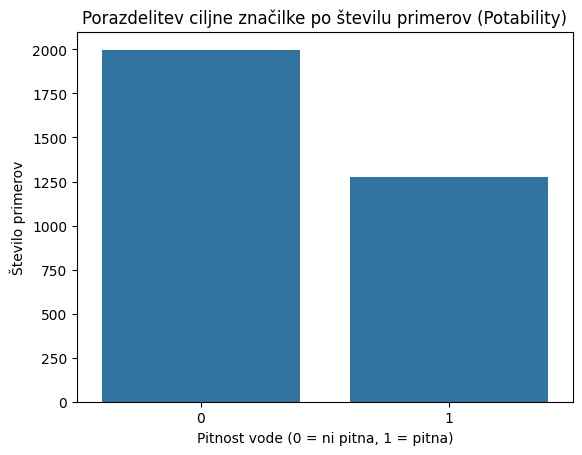

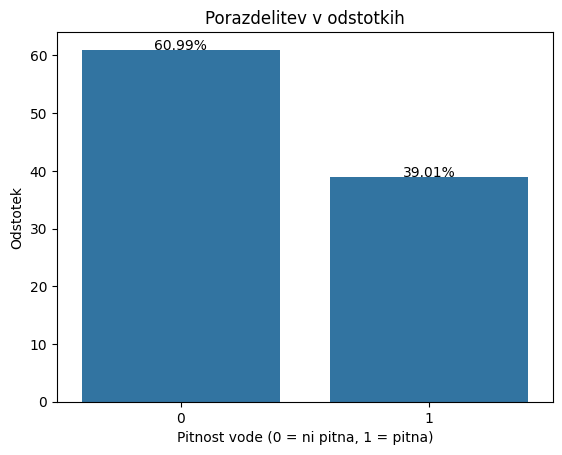

In [38]:
# Porazdelitev ciljne značilke
print("Porazdelitev vrednosti v stolpcu 'Potability':")
print(data['Potability'].value_counts())
print("\nDelež posameznih vrednosti:")
print(data['Potability'].value_counts(normalize=True))

# Vizualizacija porazdelitve po številu primerov
sns.countplot(x='Potability', data=data)
plt.title('Porazdelitev ciljne značilke po številu primerov (Potability)')
plt.xlabel('Pitnost vode (0 = ni pitna, 1 = pitna)')
plt.ylabel('Število primerov')
plt.show()

# Izračun razporeditve razredov v odstotkih
class_dist = (data['Potability'].value_counts(normalize=True) * 100).round(2)

# Priprava slike in osi
fig, axes = plt.subplots()

# Prikaz razporeditve v odstotkih
sns.barplot(x=class_dist.index, y=class_dist.values)
plt.title('Porazdelitev v odstotkih')
plt.xlabel('Pitnost vode (0 = ni pitna, 1 = pitna)')
plt.ylabel('Odstotek')
for i, v in enumerate(class_dist):
    plt.text(i, v, f'{v}%', ha='center')
plt.show()


##### 2.5 Razdelitev podatkov na učno in testno množico

Po nadomeščanju manjkajočih vrednosti smo podatkovno množico razdelili na učno (75 %) in testno (25 %) množico. Ta razdelitev omogoča, da modele strojnega učenja učimo na enem delu podatkov in nato neodvisno preverimo njihovo uspešnost na podatkih, ki jih model med učenjem še ni videl.

Učna množica bo uporabljena za treniranje modelov, testna pa za evalvacijo njihove natančnosti. S tem se izognemo preučenosti (overfitting) in pridobimo realnejšo oceno zmogljivosti modela.

Spodaj so prikazane osnovne statistike za obe množici ter število primerov v vsaki od njih.


In [29]:
from sklearn.model_selection import train_test_split

# Priprava vhodnih in izhodnih podatkov
X = data.drop('Potability', axis=1)  # vsebuje podatke, na podlagi katerih model uči (npr. pH, sulfate, ...)
y = data['Potability'] # vsebuje tisto, kar model poskuša napovedati (ali je pitno ali ne)

# Razdelitev na učno in testno množico (75 % : 25 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Osnovne statistike učne množice
print("Osnovne statistike učne množice:")
print(X_train.describe())

# Osnovne statistike testne množice
print("\nOsnovne statistike testne množice:")
print(X_test.describe())

# Število primerov v vsaki množici
print(f"\nŠtevilo primerov v učni množici: {X_train.shape[0]}")
print(f"Število primerov v testni množici: {X_test.shape[0]}")


Osnovne statistike učne množice:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2457.000000  2457.000000   2457.000000  2457.000000  2457.000000   
mean      7.082898   196.574669  22067.550859     7.115832   333.698219   
std       1.460346    32.837192   8857.439364     1.572847    35.995247   
min       0.000000    73.492234    728.750830     0.352000   129.000000   
25%       6.281904   176.772186  15736.580986     6.112819   317.301369   
50%       7.036752   197.215210  20933.512750     7.130161   333.073546   
75%       7.861178   217.324800  27198.432591     8.105803   350.445293   
max      14.000000   323.124000  61227.196008    13.043806   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   2457.000000     2457.000000      2457.000000  2457.000000  
mean     426.557199       14.257422        66.469890     3.954781  
std       81.572020        3.285923        15.895286     0.775821  
min      181.483754

##### 2.3 Vizualizacija distribucij atributov

Za boljše razumevanje podatkov smo izvedli vizualizacijo posameznih atributov z uporabo histogramov. Histogrami prikazujejo porazdelitev vrednosti v različnih razredih, kar nam omogoča vpogled v tipične vrednosti, odstopanja, simetrijo porazdelitve in prisotnost ekstremnih vrednosti.

Pri atributih, kot so ph, Sulfate in Conductivity, smo opazili različno porazdelitev – od skoraj normalne do izrazito asimetrične. To lahko vpliva na rezultate modelov, saj nekateri algoritmi predvidevajo določeno porazdelitev podatkov.

Porazdelitev ciljne spremenljivke Potability kaže na zmerno neuravnoteženost, saj je približno 61 % vzorcev označenih kot nepitnih, 39 % pa kot pitnih. To razmerje je še vedno dovolj stabilno, da omogoča klasične metode klasifikacije brez posebnih prilagoditev.

Z vizualizacijo lahko dodatno primerjamo porazdelitve atributov med učno in testno množico, kar potrjuje, da razdelitev podatkov ni povzročila porazdelitvene pristranskosti.


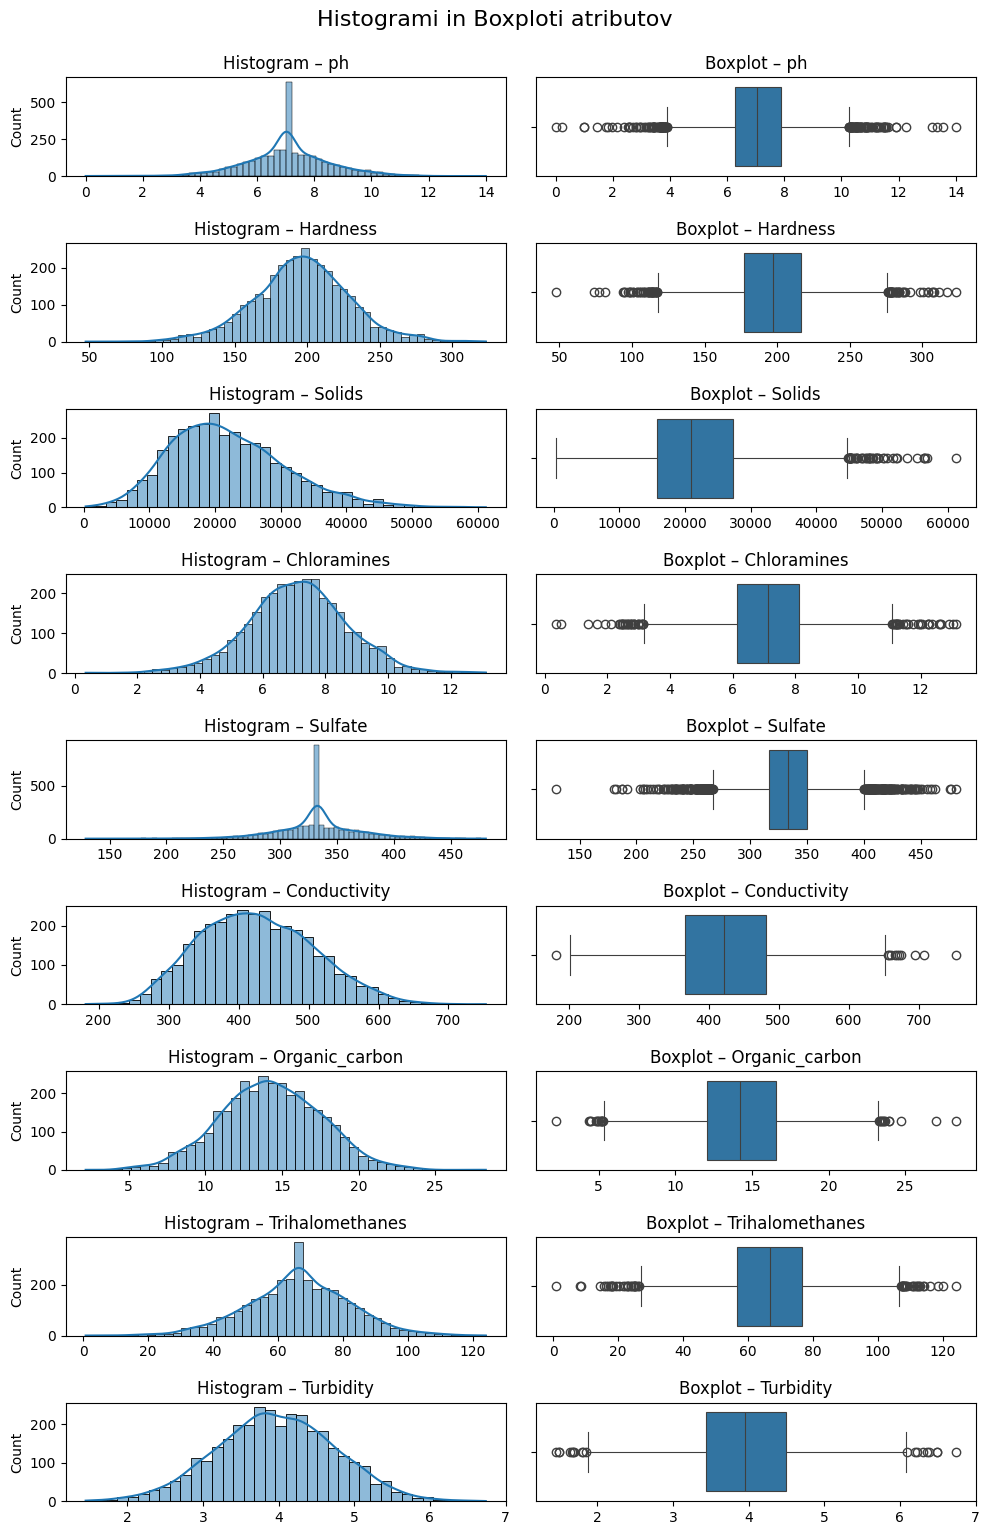

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prikaz histogramov in boxplotov za vsak atribut
fig, axes = plt.subplots(9, 2, figsize=(10, 15))

# Odstranimo ciljno značilko
features = data.columns.drop('Potability')

for idx, col in enumerate(features):
    # Histogram
    sns.histplot(data=data, x=col, ax=axes[idx, 0], kde=True)
    axes[idx, 0].set_title(f"Histogram – {col}")
    axes[idx, 0].set_xlabel("")

    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[idx, 1], orient='h', linewidth=0.8)
    axes[idx, 1].set_title(f"Boxplot – {col}")
    axes[idx, 1].set_xlabel("")

plt.tight_layout(h_pad=1.5, w_pad=1.5)
plt.suptitle("Histogrami in Boxploti atributov", fontsize=16, y=1.02)
plt.show()


Histogrami atributov prikazujejo porazdelitev vrednosti v podatkovni množici. Večina atributov ima običajno, zvonasto porazdelitev, brez izrazitih ekstremov, kar je ugodno za nadaljnje modeliranje.

Atributi, kot so Hardness, Chloramines, Organic_carbon, Trihalomethanes, Turbidity in Conductivity, imajo razmeroma simetrične in stabilne porazdelitve brez večjih odstopanj. Ti atributi so dobro uravnoteženi in primerni za uporabo v modelih brez dodatne obdelave.

Posebno pozornost je treba nameniti atributom:
- Sulfate, kjer je opazen izrazit umetni vrh zaradi nadomeščanja manjkajočih vrednosti z mediano, kar lahko vpliva na rezultate,
- Solids, ki ima desno zamaknjeno porazdelitev z nekaj ekstremnimi vrednostmi (outlierji), kar lahko vodi v pristranskost modela,
- pH, kjer so prisotne skrajne vrednosti izven priporočene meje za pitno vodo (6.5–8.5), kar lahko vpliva na robustnost modela.

Skupno gledano nam vizualizacija pomaga razumeti, kateri atributi so že primerni za modeliranje in pri katerih bo morda potrebna dodatna obdelava, kot je normalizacija ali odstranjevanje ekstremov.





##### 2.4 Analiza korelacij

Analiza korelacij nam omogoča vpogled v povezanost med posameznimi atributi v podatkovni množici. Korelacija meri, v kolikšni meri se sprememba enega atributa povezuje s spremembo drugega. V tej analizi bomo uporabili Pearsonov korelacijski koeficient, ki zajema linearno povezanost med atributi in se giblje med -1 in 1.

Pozitivna korelacija pomeni, da se vrednosti dveh atributov povečujeta hkrati, negativna korelacija pa kaže na obratno povezanost. Vrednosti blizu 0 pomenijo, da med atributoma ni linearne povezave.

Z analizo korelacij bomo:
- ugotovili, ali obstajajo atributi, ki so med seboj močno povezani (redundantni),
- identificirali potencialne vplive atributov na ciljno značilko ,
- po potrebi izločili ali združili zelo močno korelirane atribute, da se izognemo multikolinearnosti v modelih.

Korelacijsko matriko bomo vizualizirali z uporabo toplotnega zemljevida (heatmap), ki nam omogoča hiter pregled vseh medsebojnih povezav.


Preverjanje: so manjkajoče vrednosti odpravljene?
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


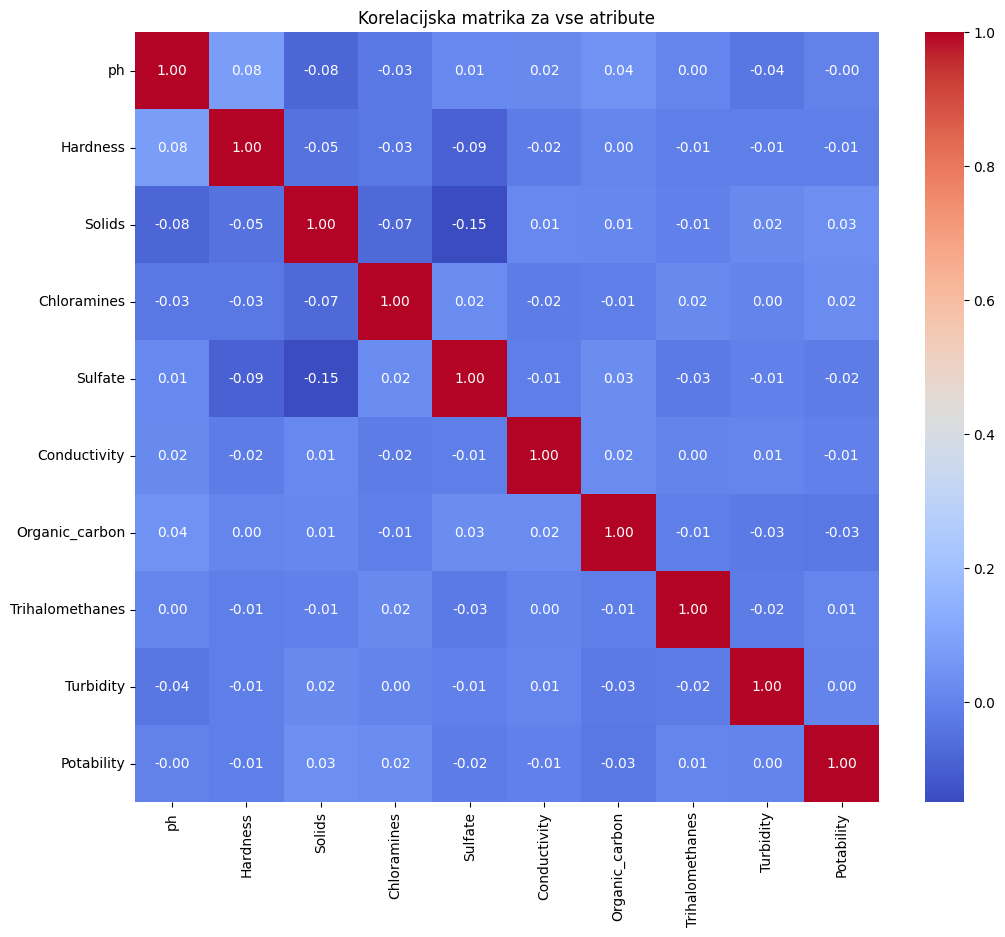

Korelacije med atributi in ciljno spremenljivko 'Potability':
Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006887
Turbidity          0.001581
ph                -0.003014
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020476
Organic_carbon    -0.030001
Name: Potability, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Preverjanje: so manjkajoče vrednosti odpravljene?") #preverjam po svoe če je v redu
print(data.isnull().sum())

# Izračun korelacijske matrike
correlation_matrix = data.corr()

# Prikaz korelacijske matrike z uporabo seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelacijska matrika za vse atribute')
plt.show()

# Korelacije z ciljno značilko 'Potability'
target_correlation = correlation_matrix['Potability'].sort_values(ascending=False)
print("Korelacije med atributi in ciljno spremenljivko 'Potability':")
print(target_correlation)


---

##### 2.5 Analiza korelacij med atributi in ciljno spremenljivko

Korelacijska analiza med posameznimi atributi in ciljno značilko Potability je pokazala, da so linearne povezave razmeroma šibke. Najvišja korelacija je bila zaznana pri atributu Solids(0.0337), kar pomeni zelo šibko pozitivno povezavo s pitnostjo vode. Podobno velja za Chloramines (0.0238) in Trihalomethanes (0.0071), kjer je povezava še šibkejša.

Atributi, kot so Turbidity, ph, Conductivity, Hardness, Sulfate in Organic_carbon, imajo zelo nizke negativne korelacije z Pitnost, vse blizu ničle. Najnižjo (čeprav še vedno zelo šibko) negativno korelacijo ima Organic_carbon (-0.03).

Ti rezultati nakazujejo, da med posameznimi atributi in pitnostjo vode **ni močne linearne povezave**. To pomeni, da **enostavni linearni modeli (kot je logistična regresija)** morda ne bodo dovolj za dobro klasifikacijo. Vseeno, bomo logistično regresijo vključili kot en osnovni model (baseline), ker ta nam bo služila kot izhodiščna točka za primerjavo uspešnosti bolj naprednih in nelinearnih modelov.

Na koncu, vsi atributi imajo korelacijo z Potability pod ±0.04 → to je zelo šibka povezava. To ni slabo, ampak pomeni, da je pitnost vode verjetno rezultat kompleksne kombinacije več atributov, ne enega samega.
To upravičuje uporabo modelov, kot so Random Forest, SVM, XGBoost, ki bolje obravnavajo take primere.


### 3. Metode

##### 3.1 Kratek opis uporabljenih metod, izbranih parametrov, načina evalvacije in uporabljene evalvacijske metrike 

##### 3.1.1 Logistična regresija (Logistic Regression)

**Opis metode:**  
Logistična regresija je osnovni klasifikacijski model, ki predpostavlja linearno razmerje med značilkami in verjetnostjo, da primer spada v določen razred. Primerna je za binarne klasifikacijske probleme.

**Izbrani parametri:**
- solver='liblinear' : priporočljiv za manjše množice in binarno klasifikacijo.
- random_state=42: zagotavlja ponovljivost rezultatov.

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, klasifikacijsko poročilo (precision, recall, F1), matrika zmede, ROC krivulja.

---

##### 3.1.2 K najbližjih sosedov (K-Nearest Neighbors – KNN)

**Opis metode:**  
Model razvršča nov primer glede na večino razredov k najbližjih točk v učni množici. Ne predpostavlja oblike med razredi, zato je primeren za nelinearne probleme.

**Izbrani parametri:**
- n_neighbors=5: standardna začetna vrednost, ki dobro deluje na večini množic.

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, klasifikacijsko poročilo, matrika zmede, ROC krivulja.

---

##### 3.1.3 Podporni vektorski stroj (Support Vector Machine – SVM)

**Opis metode:**  
SVM išče optimalno mejo (hiperplano), ki loči razrede z največjo možno margino. S pomočjo jedrne funkcije (kernel) se lahko spopada z nelinearnimi odnosi.

**Izbrani parametri:**
- kernel='rbf': radialna osnovna funkcija, ki omogoča nelinearno ločevanje.
- C=1.0: osnovna vrednost za uravnavanje meje.
- probability=True: omogoča izračun verjetnosti za AUC in ROC.

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, F1, ROC krivulja, matrika zmede.

---

##### 3.1.4 Naključni gozd (Random Forest)

**Opis metode:**  
Random Forest združuje več odločilnih dreves za zmanjševanje variance in izboljšanje natančnosti. Deluje dobro tudi pri nelinearnih povezavah in obdelavi šuma.

**Izbrani parametri:**
- n_estimators=100: število dreves za dosego stabilnosti.
- random_state=42: za ponovljivost rezultatov.

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, klasifikacijsko poročilo, matrika zmede, ROC krivulja in pomembnost značilk.

---

##### 3.1.5 XGBoost (Extreme Gradient Boosting)

**Opis metode:**  
Napreden ansambelski model, ki gradi več šibkih klasifikatorjev zaporedno in vsakega uči iz napak predhodnih. Izjemno natančen in učinkovit.

**Izbrani parametri:**
- n_estimators=100: število klasifikatorjev.
- learning_rate=0.1: hitrost učenja.
- max_depth=4: preprečuje preobučitev.
- subsample=0.8, colsample_bytree=0.8: zmanjša korelacijo med drevesi.
- random_state=42, use_label_encoder=False, eval_metric='logloss': za stabilno in jasno delovanje.

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, klasifikacijsko poročilo, matrika zmede, ROC krivulja in pomembnost značilk.

---

##### 3.1.6 Naivni Bayes (GaussianNB)

**Opis metode:**  
Temelji na Bayesovem izreku s predpostavko, da so značilke neodvisne. Uporaben pri visoki dimenzionalnosti podatkov in presenetljivo učinkovit za preprosto strukturo.

**Izbrani parametri:**
- Privzeti parametri modela GaussianNB().

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, klasifikacijsko poročilo, matrika zmede, ROC krivulja.

---

##### 3.1.7 Odločitveno drevo (Decision Tree)

**Opis metode:**  
Drevesna struktura, kjer se vsaka veja odloča glede na pogoj na posamezni značilki. Intuitivno razumljiv in dobro deluje tudi brez standardizacije.

**Izbrani parametri:**
- random_state=42: za stabilno ponovljivost.
- Privzeta globina in razvejitev.

**Evalvacija:**
- Uporabljene metrike: Accuracy, AUC, klasifikacijsko poročilo, matrika zmede, ROC krivulja in pomembnost značilk.


=== Logistična regresija (uravnoteženi razredi) ===
Točnost: 0.5336
ROC AUC: 0.5461
              precision    recall  f1-score   support

           0       0.65      0.55      0.59       510
           1       0.41      0.51      0.45       309

    accuracy                           0.53       819
   macro avg       0.53      0.53      0.52       819
weighted avg       0.56      0.53      0.54       819



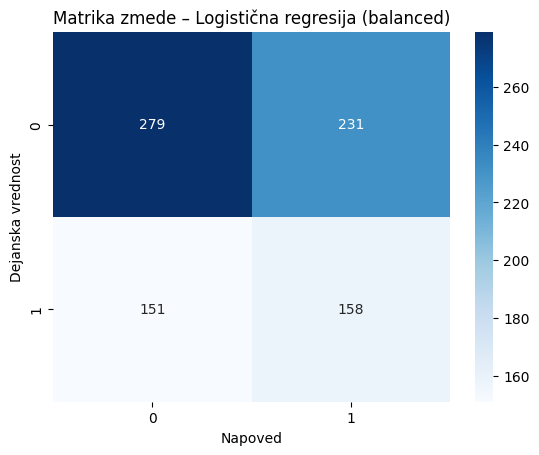

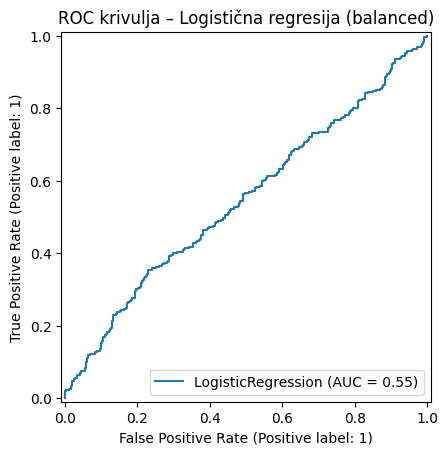

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Ustvarimo in naučimo logistični model z uravnoteženimi razredi
lr_balanced = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
lr_balanced.fit(X_train_scaled, y_train)

# Napovedi in verjetnosti
y_pred_lr_bal = lr_balanced.predict(X_test_scaled)
y_prob_lr_bal = lr_balanced.predict_proba(X_test_scaled)[:, 1]

# Rezultati
print("=== Logistična regresija (uravnoteženi razredi) ===")
print("Točnost:", round(accuracy_score(y_test, y_pred_lr_bal), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_prob_lr_bal), 4))
print(classification_report(y_test, y_pred_lr_bal))

# Matrika zmede
sns.heatmap(confusion_matrix(y_test, y_pred_lr_bal), annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede – Logistična regresija (balanced)")
plt.xlabel("Napoved")
plt.ylabel("Dejanska vrednost")
plt.show()

# ROC krivulja
RocCurveDisplay.from_estimator(lr_balanced, X_test_scaled, y_test)
plt.title("ROC krivulja – Logistična regresija (balanced)")
plt.show()


Random Forest - Točnost: 0.6825396825396826
              precision    recall  f1-score   support

           0       0.69      0.88      0.78       510
           1       0.65      0.35      0.45       309

    accuracy                           0.68       819
   macro avg       0.67      0.62      0.62       819
weighted avg       0.67      0.68      0.65       819



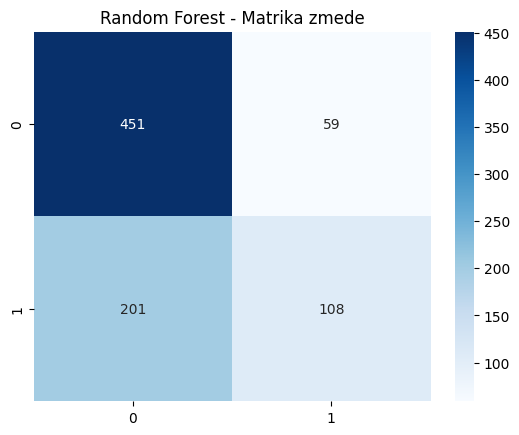

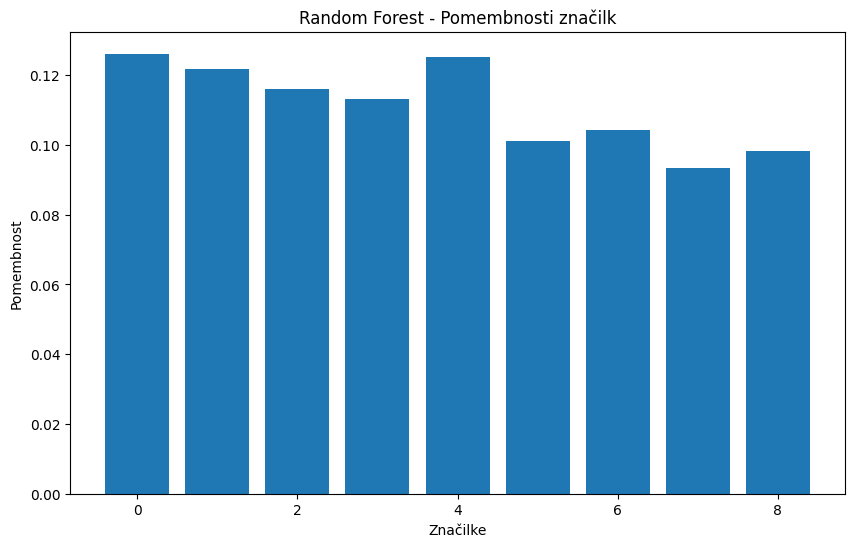

In [77]:
# Import potrebnih knjižnic
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Standardizacija podatkov
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Točnost:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='Blues')
plt.title("Random Forest - Matrika zmede")
plt.show()

# Pomembnosti značilk za Random Forest
feature_importances_rf = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_rf)), feature_importances_rf)
plt.title("Random Forest - Pomembnosti značilk")
plt.xlabel("Značilke")
plt.ylabel("Pomembnost")
plt.show()

=== K-Nearest Neighbors ===
Točnost: 0.6252
AUC: 0.6154
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       510
           1       0.50      0.40      0.45       309

    accuracy                           0.63       819
   macro avg       0.59      0.58      0.58       819
weighted avg       0.61      0.63      0.61       819



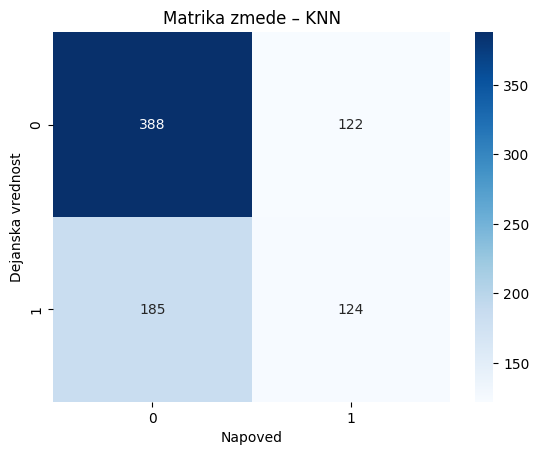

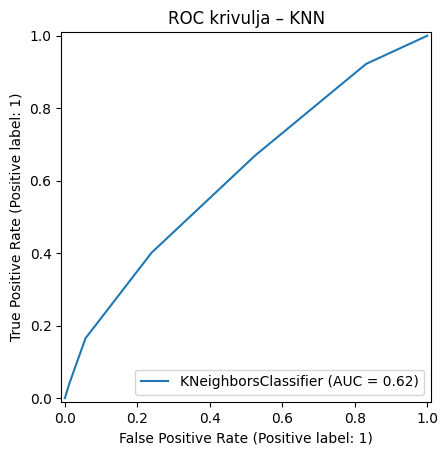

In [78]:
from sklearn.neighbors import KNeighborsClassifier

# Treniranje modela
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Napovedi in verjetnosti
y_pred_knn = knn_model.predict(X_test_scaled)
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Rezultati
print("=== K-Nearest Neighbors ===")
print("Točnost:", round(accuracy_score(y_test, y_pred_knn), 4))
print("AUC:", round(roc_auc_score(y_test, y_prob_knn), 4))
print(classification_report(y_test, y_pred_knn))

# Matrika zmede
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede – KNN")
plt.xlabel("Napoved")
plt.ylabel("Dejanska vrednost")
plt.show()

# ROC krivulja
RocCurveDisplay.from_estimator(knn_model, X_test_scaled, y_test)
plt.title("ROC krivulja – KNN")
plt.show()


=== Support Vector Machine ===
Točnost: 0.6972
AUC: 0.6897
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       510
           1       0.72      0.32      0.45       309

    accuracy                           0.70       819
   macro avg       0.71      0.62      0.62       819
weighted avg       0.70      0.70      0.66       819



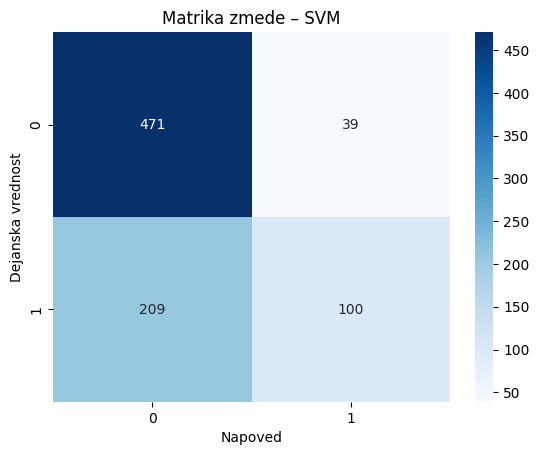

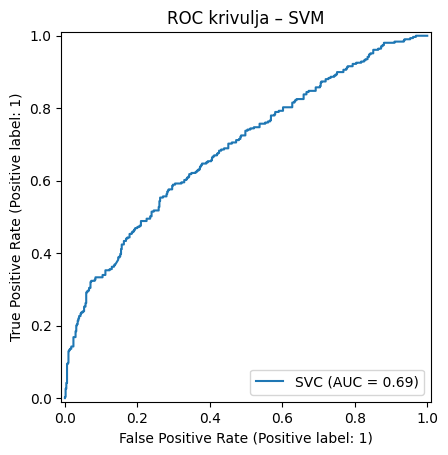

In [79]:
from sklearn.svm import SVC

# SVM z radialno jedrno funkcijo
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Napovedi in verjetnosti
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Rezultati
print("=== Support Vector Machine ===")
print("Točnost:", round(accuracy_score(y_test, y_pred_svm), 4))
print("AUC:", round(roc_auc_score(y_test, y_prob_svm), 4))
print(classification_report(y_test, y_pred_svm))

# Matrika zmede
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede – SVM")
plt.xlabel("Napoved")
plt.ylabel("Dejanska vrednost")
plt.show()

# ROC krivulja
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title("ROC krivulja – SVM")
plt.show()


=== XGBoost ===
Točnost: 0.6691
AUC: 0.6958
              precision    recall  f1-score   support

           0       0.68      0.87      0.77       510
           1       0.61      0.33      0.43       309

    accuracy                           0.67       819
   macro avg       0.65      0.60      0.60       819
weighted avg       0.66      0.67      0.64       819



/Users/biseraangelovska/Downloads/Resitve_2025_4_23/visualcode/venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:07:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


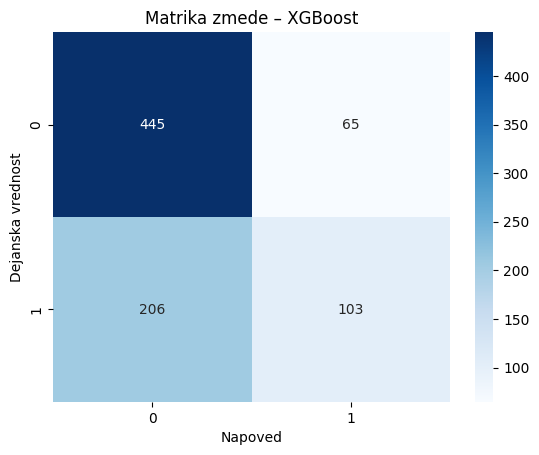

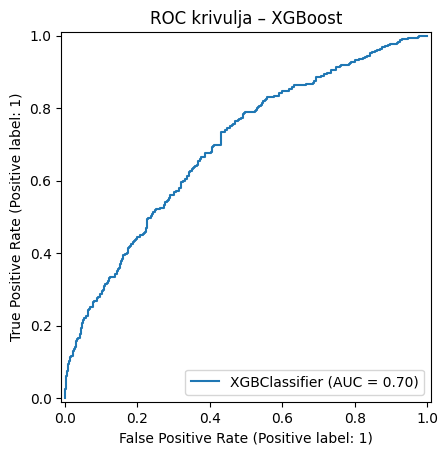

/var/folders/67/4z1x25wj1jb0qr5grmy0y68w0000gn/T/ipykernel_71407/3189647446.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pomembnost', y='Značilka', data=xgb_importance_df, palette='flare')


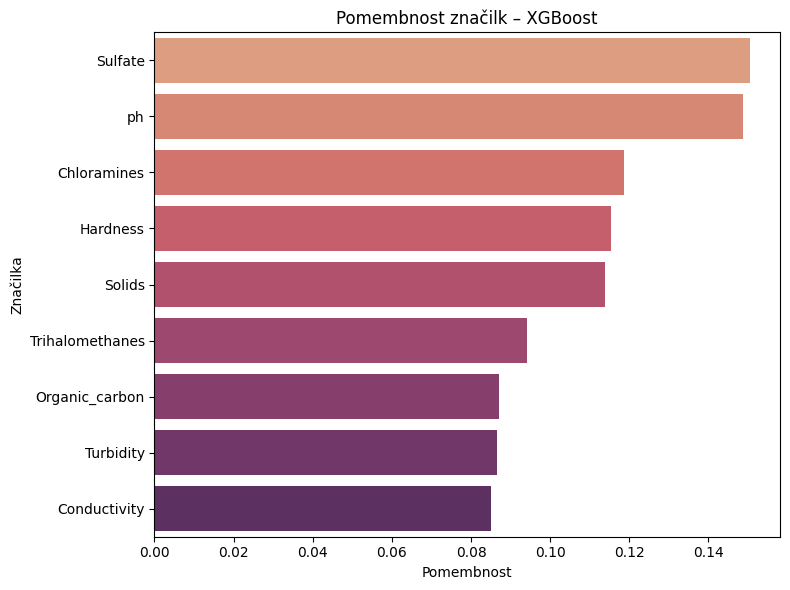

In [80]:
from xgboost import XGBClassifier

# Treniranje modela
xgb_model = XGBClassifier(
    n_estimators=100, learning_rate=0.1,
    max_depth=4, subsample=0.8, colsample_bytree=0.8,
    use_label_encoder=False, eval_metric='logloss', random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# Napovedi in verjetnosti
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Rezultati
print("=== XGBoost ===")
print("Točnost:", round(accuracy_score(y_test, y_pred_xgb), 4))
print("AUC:", round(roc_auc_score(y_test, y_prob_xgb), 4))
print(classification_report(y_test, y_pred_xgb))

# Matrika zmede
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede – XGBoost")
plt.xlabel("Napoved")
plt.ylabel("Dejanska vrednost")
plt.show()

# ROC krivulja
RocCurveDisplay.from_estimator(xgb_model, X_test_scaled, y_test)
plt.title("ROC krivulja – XGBoost")
plt.show()

# Pomembnosti značilk – XGBoost
importances_xgb = xgb_model.feature_importances_

xgb_importance_df = pd.DataFrame({
    'Značilka': X.columns,
    'Pomembnost': importances_xgb
}).sort_values(by='Pomembnost', ascending=False)

# Vizualizacija
plt.figure(figsize=(8, 6))
sns.barplot(x='Pomembnost', y='Značilka', data=xgb_importance_df, palette='flare')
plt.title("Pomembnost značilk – XGBoost")
plt.xlabel("Pomembnost")
plt.ylabel("Značilka")
plt.tight_layout()
plt.show()


=== Naivni Bayes ===
Točnost: 0.6361
AUC: 0.6212
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       510
           1       0.55      0.21      0.31       309

    accuracy                           0.64       819
   macro avg       0.60      0.55      0.53       819
weighted avg       0.61      0.64      0.58       819



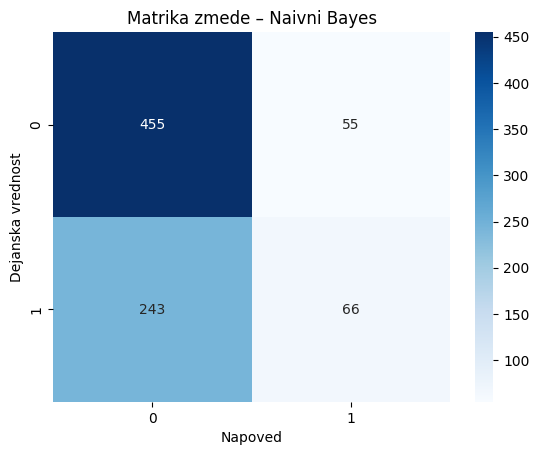

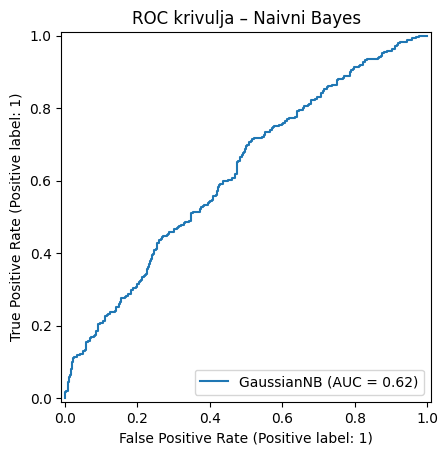

In [81]:
from sklearn.naive_bayes import GaussianNB

# Treniranje modela
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Napovedi in verjetnosti
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Rezultati
print("=== Naivni Bayes ===")
print("Točnost:", round(accuracy_score(y_test, y_pred_nb), 4))
print("AUC:", round(roc_auc_score(y_test, y_prob_nb), 4))
print(classification_report(y_test, y_pred_nb))

# Matrika zmede
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede – Naivni Bayes")
plt.xlabel("Napoved")
plt.ylabel("Dejanska vrednost")
plt.show()

# ROC krivulja
RocCurveDisplay.from_estimator(nb_model, X_test_scaled, y_test)
plt.title("ROC krivulja – Naivni Bayes")
plt.show()


=== Odločitveno drevo ===
Točnost: 0.5958
AUC: 0.5875
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       510
           1       0.47      0.55      0.51       309

    accuracy                           0.60       819
   macro avg       0.58      0.59      0.58       819
weighted avg       0.61      0.60      0.60       819



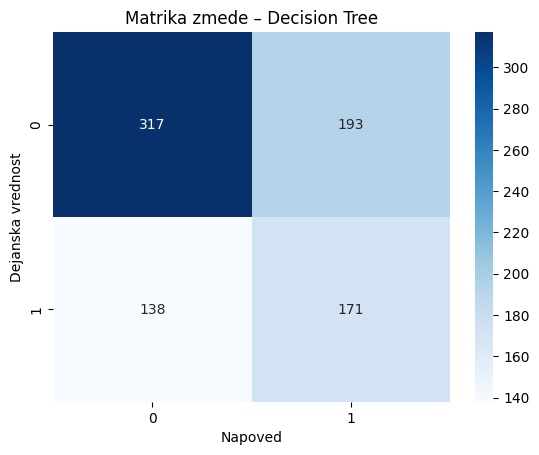

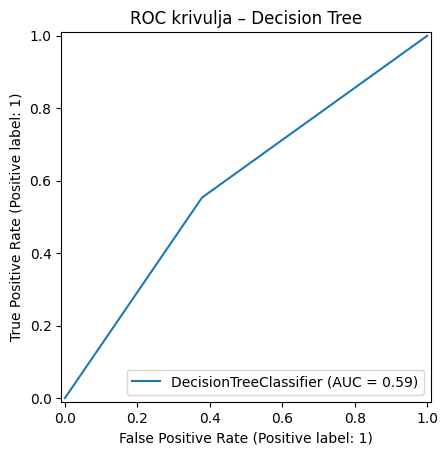

/var/folders/67/4z1x25wj1jb0qr5grmy0y68w0000gn/T/ipykernel_71407/2375611748.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pomembnost', y='Značilka', data=dt_importance_df, palette='viridis')


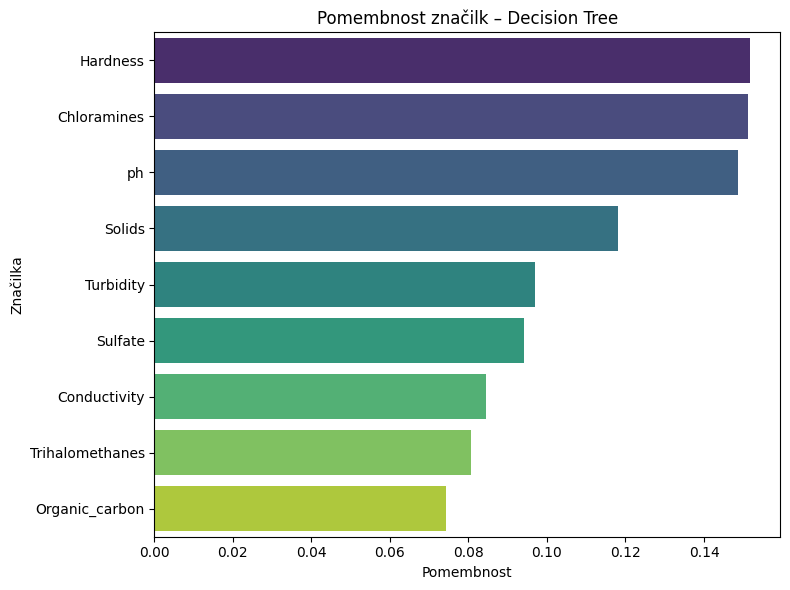

In [82]:
from sklearn.tree import DecisionTreeClassifier

# Treniranje modela
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Napovedi in verjetnosti
y_pred_dt = dt_model.predict(X_test_scaled)
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Rezultati
print("=== Odločitveno drevo ===")
print("Točnost:", round(accuracy_score(y_test, y_pred_dt), 4))
print("AUC:", round(roc_auc_score(y_test, y_prob_dt), 4))
print(classification_report(y_test, y_pred_dt))

# Matrika zmede
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Matrika zmede – Decision Tree")
plt.xlabel("Napoved")
plt.ylabel("Dejanska vrednost")
plt.show()

# ROC krivulja
RocCurveDisplay.from_estimator(dt_model, X_test_scaled, y_test)
plt.title("ROC krivulja – Decision Tree")
plt.show()


# Pomembnosti značilk – Decision Tree
importances_dt = dt_model.feature_importances_

dt_importance_df = pd.DataFrame({
    'Značilka': X.columns,
    'Pomembnost': importances_dt
}).sort_values(by='Pomembnost', ascending=False)

# Vizualizacija
plt.figure(figsize=(8, 6))
sns.barplot(x='Pomembnost', y='Značilka', data=dt_importance_df, palette='viridis')
plt.title("Pomembnost značilk – Decision Tree")
plt.xlabel("Pomembnost")
plt.ylabel("Značilka")
plt.tight_layout()
plt.show()



In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
import pandas as pd

# Prazen seznam za shranjevanje rezultatov
rezultati_modelov = []

# Razširjena funkcija, ki ne samo izpiše, ampak tudi shrani rezultate
def zberi_metrike(model_name, y_test, y_pred, y_prob):
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    rezultati_modelov.append({
        "Model": model_name,
        "Accuracy": round(acc, 4),
        "ROC AUC": round(auc, 4),
        "F1-score (razred 1)": round(f1, 4)
    })

# Pokliči za vsak model
zberi_metrike(
    "Random Forest", y_test, y_pred_rf, rf_model.predict_proba(pd.DataFrame(X_test_scaled, columns=X.columns))[:, 1])
zberi_metrike("K-Nearest Neighbors", y_test, y_pred_knn, y_prob_knn)
zberi_metrike("Support Vector Machine", y_test, y_pred_svm, y_prob_svm)
zberi_metrike("XGBoost", y_test, y_pred_xgb, y_prob_xgb)
zberi_metrike("Naive Bayes", y_test, y_pred_nb, y_prob_nb)
zberi_metrike("Decision Tree", y_test, y_pred_dt, y_prob_dt)
zberi_metrike("Logistic Regression (balanced)", y_test, y_pred_lr_bal, lr_balanced.predict_proba(X_test_scaled)[:, 1])


# Ustvari tabelo iz rezultatov
df_rezultati = pd.DataFrame(rezultati_modelov)

# Prikaz v notebooku (ali uporabi print(df_rezultati))
from IPython.display import display
display(df_rezultati)



,Model,Accuracy,ROC AUC,F1-score (razred 1)
0,Random Forest,0.6825,0.5158,0.4538
1,K-Nearest Neighbors,0.6252,0.6154,0.4468
2,Support Vector Machine,0.6972,0.6897,0.4464
3,XGBoost,0.6691,0.6958,0.4319
4,Naive Bayes,0.6361,0.6212,0.3070
5,Decision Tree,0.5958,0.5875,0.5082
6,Logistic Regression (balanced),0.5336,0.5461,0.4527


##### 3.2 Analiza in interpretacija rezultatov

V tej fazi smo primerjali uspešnost različnih modelov strojnega učenja pri nalogi napovedovanja pitnosti vode na podlagi kemijskih značilnosti. 
Za vsak model so bile prikazane:
- matrike zmede (confusion matrices),
- ROC krivulje (ROC curves),
- in pri Random Forest, XGBoost in DecisionTree tudi pomembnosti značilk.

- **Najboljši rezultat po točnosti** dosega **Support Vector Machine (SVM)** z 69,7 % natančnostjo, kar je nekoliko nad povprečjem.
- **Najvišji ROC AUC** dosegata **XGBoost (0.6958)** in **SVM (0.6897)**, kar pomeni, da ti modeli najbolje ločujejo med pitno in nepitno vodo.
- **F1-score za razred 1** (pitna voda) je največji pri **Random Forest (0.4538)** in **KNN (0.4468)**, kar pomeni boljše ravnovesje med natančnostjo in pokritostjo za manj pogost razred.

Modeli **Logistična regresija** in **Odločitveno drevo** se nista dobro odrezala – F1-score je 0.000, kar nakazuje, da nista uspešno napovedovala pitne vode.

Rezultati kažejo, da je napovedovanje pitnosti vode izključno na podlagi kemijskih meritev zahtevno, saj:
- ni izrazitih korelacij z izhodom,
- razredi niso uravnoteženi (pitna/nepitna),
- ekstremne vrednosti lahko vplivajo na učenje modelov.

Kljub temu nekateri modeli, kot so **SVM** in **XGBoost**, dosegajo razmeroma dobre rezultate. Za izboljšanje napovedi bi bilo smiselno:
- razširiti podatkovno množico,
- vključiti dodatne okoljske ali mikrobiološke parametre,
- uporabiti metode za uravnoteženje razredov (SMOTE ipd.).

Analiza je koristna za področja varnosti pitne vode, okoljevarstva in zdravstvenega nadzora, kjer je hitra in avtomatizirana ocena kakovosti ključna za preprečevanje tveganj.


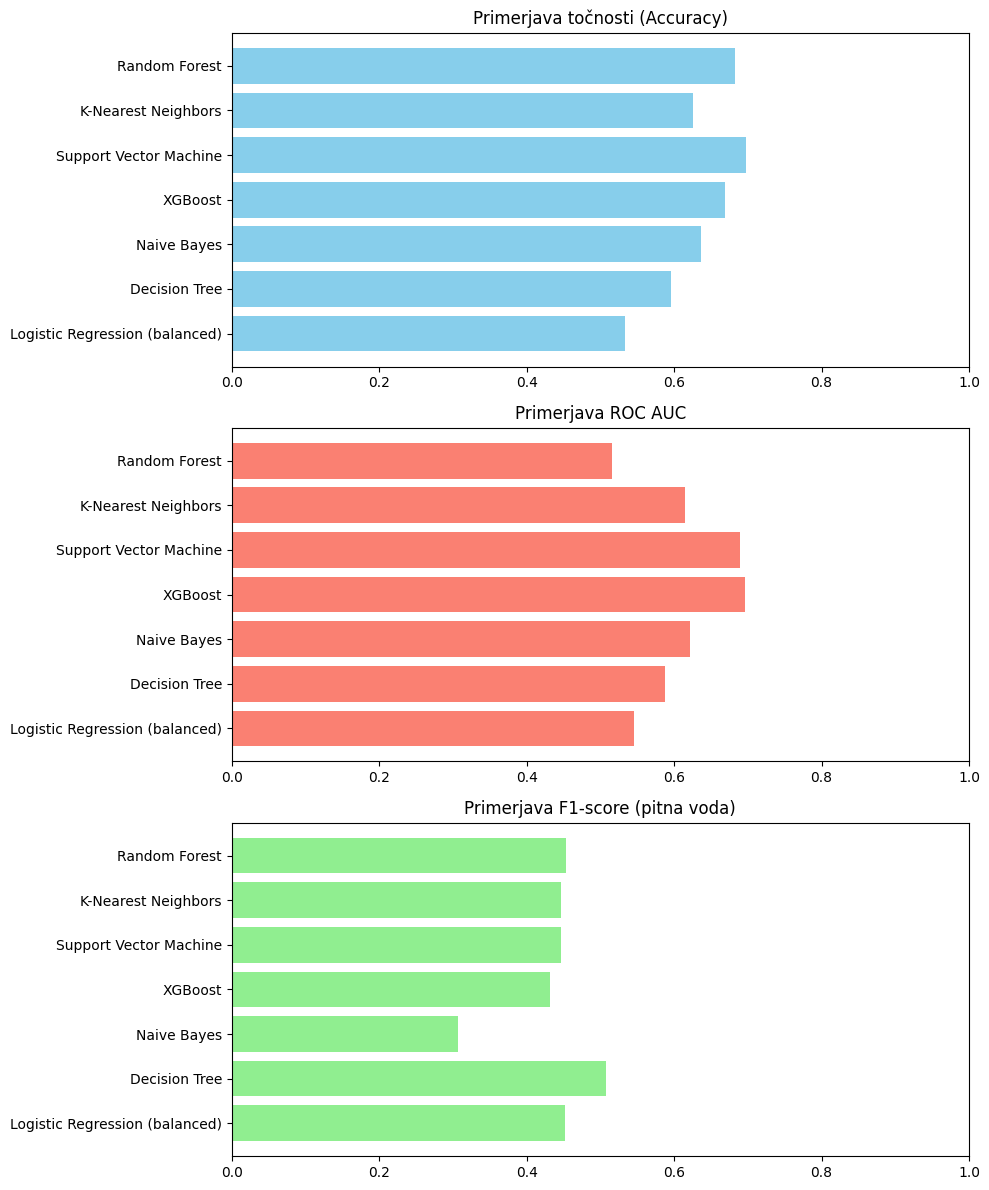

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


rezultati_modelov = [
    {"Model": "Random Forest", "Accuracy": 0.6825, "ROC AUC": 0.5158, "F1-score (razred 1)": 0.4538},
    {"Model": "K-Nearest Neighbors", "Accuracy": 0.6252, "ROC AUC": 0.6154, "F1-score (razred 1)": 0.4468},
    {"Model": "Support Vector Machine", "Accuracy": 0.6972, "ROC AUC": 0.6897, "F1-score (razred 1)": 0.4464},
    {"Model": "XGBoost", "Accuracy": 0.6691, "ROC AUC": 0.6958, "F1-score (razred 1)": 0.4319},
    {"Model": "Naive Bayes", "Accuracy": 0.6361, "ROC AUC": 0.6212, "F1-score (razred 1)": 0.3070},
    {"Model": "Decision Tree", "Accuracy": 0.5958, "ROC AUC": 0.5875, "F1-score (razred 1)": 0.5082},
    {"Model": "Logistic Regression (balanced)", "Accuracy": 0.5336, "ROC AUC": 0.5461, "F1-score (razred 1)": 0.4527}
]

# Pretvori v DataFrame
df_rezultati = pd.DataFrame(rezultati_modelov)

# Prikaz primerjalnih grafov
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Accuracy
axs[0].barh(df_rezultati["Model"], df_rezultati["Accuracy"], color='skyblue')
axs[0].set_title("Primerjava točnosti (Accuracy)")
axs[0].set_xlim(0, 1)
axs[0].invert_yaxis()

# ROC AUC
axs[1].barh(df_rezultati["Model"], df_rezultati["ROC AUC"], color='salmon')
axs[1].set_title("Primerjava ROC AUC")
axs[1].set_xlim(0, 1)
axs[1].invert_yaxis()

# F1-score
axs[2].barh(df_rezultati["Model"], df_rezultati["F1-score (razred 1)"], color='lightgreen')
axs[2].set_title("Primerjava F1-score (pitna voda)")
axs[2].set_xlim(0, 1)
axs[2].invert_yaxis()

plt.tight_layout()
plt.show()


##### 3.3 Optimizacija

Rezultati kažejo, da je napovedovanje pitnosti vode izključno na podlagi kemijskih meritev zahtevno, saj:
- ni izrazitih korelacij z izhodom,
- razredi niso uravnoteženi (pitna/nepitna),
- ekstremne vrednosti lahko vplivajo na učenje modelov.

Kljub temu nekateri modeli, kot so **SVM** in **XGBoost**, dosegajo razmeroma dobre rezultate. Za izboljšanje napovedi bi bilo smiselno:
- razširiti podatkovno množico,
- vključiti dodatne okoljske ali mikrobiološke parametre,
- uporabiti metode za uravnoteženje razredov (SMOTE-Synthetic Minority Oversampling Technique ipd).

Analiza je koristna za področja varnosti pitne vode, okoljevarstva in zdravstvenega nadzora, kjer je hitra in avtomatizirana ocena kakovosti ključna za preprečevanje tveganj.

In [99]:

# Uvoz knjižnic
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Seznam za shranjevanje rezultatov
opt_rezultati = []

# Funkcija za zbiranje metrik
def zberi_ocene(ime, model, y_true, y_pred, y_prob):
    opt_rezultati.append({
        "Model": ime,
        "Accuracy": round(accuracy_score(y_true, y_pred), 4),
        "ROC AUC": round(roc_auc_score(y_true, y_prob), 4),
        "F1-score": round(f1_score(y_true, y_pred), 4)
    })

### 1. Random Forest
param_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__class_weight': ['balanced']
}
rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_search = GridSearchCV(rf_pipeline, param_rf, scoring='f1', cv=3, n_jobs=-1)
rf_search.fit(X_train_scaled, y_train)
y_rf = rf_search.predict(X_test_scaled)
y_rf_prob = rf_search.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("Random Forest (opt)", rf_search.best_estimator_, y_test, y_rf, y_rf_prob)

### 2. KNN + SMOTE
param_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}
knn_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])
knn_search = GridSearchCV(knn_pipeline, param_knn, scoring='f1', cv=3, n_jobs=-1)
knn_search.fit(X_train_scaled, y_train)
y_knn = knn_search.predict(X_test_scaled)
y_knn_prob = knn_search.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("KNN (opt)", knn_search.best_estimator_, y_test, y_knn, y_knn_prob)

### 3. SVM + SMOTE
param_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['rbf', 'linear'],
    'classifier__class_weight': ['balanced']
}
svm_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(probability=True, random_state=42))
])
svm_search = GridSearchCV(svm_pipeline, param_svm, scoring='f1', cv=3, n_jobs=-1)
svm_search.fit(X_train_scaled, y_train)
y_svm = svm_search.predict(X_test_scaled)
y_svm_prob = svm_search.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("SVM (opt)", svm_search.best_estimator_, y_test, y_svm, y_svm_prob)

### 4. XGBoost + SMOTE
param_xgb = {
    'classifier__n_estimators': [50, 100],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0]
}
xgb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])
xgb_search = GridSearchCV(xgb_pipeline, param_xgb, scoring='f1', cv=3, n_jobs=-1)
xgb_search.fit(X_train_scaled, y_train)
y_xgb = xgb_search.predict(X_test_scaled)
y_xgb_prob = xgb_search.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("XGBoost (opt)", xgb_search.best_estimator_, y_test, y_xgb, y_xgb_prob)

### 5. Naive Bayes (brez SMOTE)
nb = GaussianNB()
nb_model = nb.fit(X_train_scaled, y_train)
y_nb = nb_model.predict(X_test_scaled)
y_nb_prob = nb_model.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("Naive Bayes", nb, y_test, y_nb, y_nb_prob)

### 6. Decision Tree + SMOTE
param_dt = {
    'classifier__max_depth': [3, 5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__class_weight': ['balanced']
}
dt_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt_search = GridSearchCV(dt_pipeline, param_dt, scoring='f1', cv=3, n_jobs=-1)
dt_search.fit(X_train_scaled, y_train)
y_dt = dt_search.predict(X_test_scaled)
y_dt_prob = dt_search.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("Decision Tree (opt)", dt_search.best_estimator_, y_test, y_dt, y_dt_prob)

### 7. Logistic Regression + SMOTE
param_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__class_weight': ['balanced']
}
lr_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))
])
lr_search = GridSearchCV(lr_pipeline, param_lr, scoring='f1', cv=3, n_jobs=-1)
lr_search.fit(X_train_scaled, y_train)
y_lr = lr_search.predict(X_test_scaled)
y_lr_prob = lr_search.predict_proba(X_test_scaled)[:, 1]
zberi_ocene("Logistic Regression (opt)", lr_search.best_estimator_, y_test, y_lr, y_lr_prob)

# Prikaz rezultatov
opt_df = pd.DataFrame(opt_rezultati)
opt_df.sort_values(by='F1-score', ascending=False, inplace=True)
print("\n--- Primerjalna tabela po optimizaciji (s SMOTE) ---")
print(opt_df.to_string(index=False))



--- Primerjalna tabela po optimizaciji (s SMOTE) ---
                    Model  Accuracy  ROC AUC  F1-score
            XGBoost (opt)    0.6508   0.6903    0.5431
                SVM (opt)    0.5995   0.6556    0.5314
      Decision Tree (opt)    0.5531   0.5874    0.5107
      Random Forest (opt)    0.6777   0.6979    0.4824
                KNN (opt)    0.5629   0.6169    0.4812
Logistic Regression (opt)    0.5287   0.5435    0.4454
              Naive Bayes    0.6361   0.6212    0.3070


##### 3.4 Zaključek

V tem projektu smo raziskovali napovedovanje pitnosti vode na podlagi kemijskih lastnosti z uporabo metod strojnega učenja. Tema je izredno uporabna na področjih varnosti pitne vode, javnega zdravja in okoljskega nadzora, kjer je pravočasna ocena kakovosti vode ključna za zaščito prebivalstva.

- Ključni koraki projekta:
izvedena je bila temeljita analiza podatkov, vključno z obdelavo manjkajočih in ekstremnih vrednosti,
podatki so bili uravnoteženi s pomočjo metode SMOTE, kar je izboljšalo sposobnost modelov za zaznavanje pitne vode,
preizkusili smo več klasifikacijskih metod, in izvedli smo optimizacijo hiperparametrov za doseganje najboljših rezultatov.

- Najboljši rezultat je dosegel XGBoost, ki se je izkazal za najprimernejšega glede na F1-score (0.5431), kar pomeni, da je bil najuspešnejši pri pravilni napovedi pitnosti. Sledila sta mu SVM in odločitveno drevo.

- Kaj sem se naučila:
    - kako pripraviti in analizirati podatke za strojno učenje,
    - pomen uravnoteženosti razredov in vpliv tega na delovanje modelov,
    - kako izvesti optimizacijo modelov in interpretirati njihove metrike,
    - kako pomembna je izbira metrik, kot je F1-score, v realnih, neuravnoteženih primerih.

Celoten proces mi je omogočil, da poglabljeno razumem strojno učenje v praksi ter pomen kakovostne priprave podatkov in ustrezne interpretacije rezultatov. Projekt predstavlja dober temelj za nadaljnje raziskave in aplikacije v realnem okolju.